In [ ]:
pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Using device: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.64MB/s]


[Epoch 1/50] D loss: 0.5483 | G loss: 0.7042
[Epoch 2/50] D loss: 0.5973 | G loss: 0.7177
[Epoch 3/50] D loss: 0.5371 | G loss: 1.1157
[Epoch 4/50] D loss: 0.5498 | G loss: 0.9348
[Epoch 5/50] D loss: 0.5671 | G loss: 1.2859
[Epoch 6/50] D loss: 0.4484 | G loss: 1.2503
[Epoch 7/50] D loss: 0.5704 | G loss: 0.6391
[Epoch 8/50] D loss: 0.4214 | G loss: 0.8616
[Epoch 9/50] D loss: 0.6079 | G loss: 0.5435
[Epoch 10/50] D loss: 0.4882 | G loss: 0.9139
[Epoch 11/50] D loss: 0.4839 | G loss: 0.7859
[Epoch 12/50] D loss: 0.6244 | G loss: 2.6639
[Epoch 13/50] D loss: 0.4146 | G loss: 1.1216
[Epoch 14/50] D loss: 0.3653 | G loss: 1.2940
[Epoch 15/50] D loss: 0.4587 | G loss: 1.3475
[Epoch 16/50] D loss: 0.4828 | G loss: 1.2578
[Epoch 17/50] D loss: 0.4177 | G loss: 1.4935
[Epoch 18/50] D loss: 0.3355 | G loss: 1.3020
[Epoch 19/50] D loss: 0.4039 | G loss: 1.2809
[Epoch 20/50] D loss: 0.5579 | G loss: 2.6152
[Epoch 21/50] D loss: 0.4253 | G loss: 1.0089
[Epoch 22/50] D loss: 0.3619 | G loss: 1.37

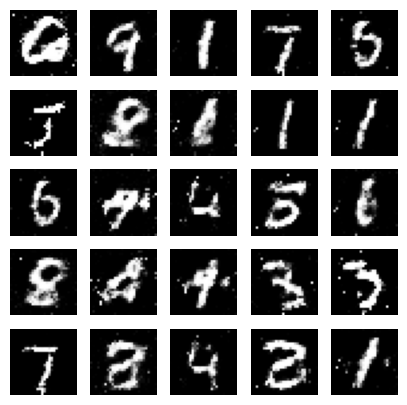

✅ Final image saved to: output/final_generated_digits.png


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# =======================
#        Settings
# =======================
latent_dim = 100
img_shape = (1, 28, 28)
batch_size = 128
epochs = 50
lr = 0.0002
b1 = 0.5
b2 = 0.999
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# =======================
#   Data Preparation
# =======================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# =======================
#     Generator Model
# =======================
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, int(torch.prod(torch.tensor(img_shape)))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(z.size(0), *img_shape)

# =======================
#   Discriminator Model
# =======================
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(int(torch.prod(torch.tensor(img_shape))), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

# =======================
#        Training
# =======================
generator = Generator().to(device)
discriminator = Discriminator().to(device)

loss_fn = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

for epoch in range(epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = imgs.to(device)
        valid = torch.ones(imgs.size(0), 1, device=device)
        fake = torch.zeros(imgs.size(0), 1, device=device)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), latent_dim, device=device)
        gen_imgs = generator(z)
        g_loss = loss_fn(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = loss_fn(discriminator(real_imgs), valid)
        fake_loss = loss_fn(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{epochs}] D loss: {d_loss.item():.4f} | G loss: {g_loss.item():.4f}")

# =======================
#      Final Output
# =======================
def save_final_output():
    z = torch.randn(25, latent_dim).to(device)
    gen_imgs = generator(z).cpu().detach()

    fig, axs = plt.subplots(5, 5, figsize=(5, 5))
    cnt = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(gen_imgs[cnt, 0, :, :], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

    os.makedirs("output", exist_ok=True)
    plt.savefig("output/final_generated_digits.png")
    plt.show()
    print("✅ Final image saved to: output/final_generated_digits.png")

save_final_output()
